In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import*
from scipy.integrate import quad

In [2]:
d=500
k=700

gamma=k/d


Sigma=np.ones(d)

sigma_w=sigma_a=1.

Delta=.000





In [3]:
sigma=1.
phi=lambda x: np.tanh(2*x)



f=phi
r1=sigma

k11=quad(lambda x: np.exp(-.5*x**2/r1)*x*f(x)/np.sqrt(2*np.pi*r1),-np.inf,np.inf)[0]/r1


var1=quad(lambda x: np.exp(-.5*x**2/r1)*f(x)**2/np.sqrt(2*np.pi*r1),-np.inf,np.inf)[0]
ks1=np.sqrt(var1-r1*k11**2)

k11,ks1=k11**2,ks1**2

r2=sigma*var1

k12=quad(lambda x: np.exp(-.5*x**2/r2)*x*f(x)/np.sqrt(2*np.pi*r2),-np.inf,np.inf)[0]/r2


var2=quad(lambda x: np.exp(-.5*x**2/r2)*f(x)**2/np.sqrt(2*np.pi*r2),-np.inf,np.inf)[0]
ks2=np.sqrt(var2-r2*k12**2)

k12,ks2=k12**2,ks2**2



In [4]:
def update_overlaps(Vhat,qhat,mhat,lamb):
    V=np.mean(Sigma/(lamb+Vhat*Sigma))
    q=np.mean((mhat**2*Sigma**3+qhat*Sigma**2)/(lamb+Vhat*Sigma)**2)
    m=sigma_w**2*sigma_a**2*mhat*np.mean(Sigma**2/(lamb+Vhat*Sigma))
    
    return V,q,m

In [5]:
def update_hat_overlaps(alpha, V,q,m):
    Vhat=alpha/(1+V)
    mhat=np.sqrt(k11*k12)*Vhat
    qhat=alpha*(k11*k12+ks1*k12+ks2+q-2*np.sqrt(k11*k12)*m+Delta)/(1+V)**2
    
    return Vhat,qhat,mhat
    
    

In [6]:
damping=0.1

def damp(new, old):
        return (1-damping) * new + damping * old

In [7]:


def iterate(alpha,lamb,max_iter=10000,tol=1e-15,init=None,verbose=False):
    last_flip=None
    V,q,m=100,.000001, .0000001
    Vhat,qhat,mhat=0,0,0
    for i in range(max_iter):
        Vhat,qhat,mhat=update_hat_overlaps(alpha,V,q,m)
        V_tmp,q_tmp,m_tmp=update_overlaps(Vhat,qhat,mhat,lamb)
        if max([np.abs(V_tmp-V),np.abs(q_tmp-q),np.abs(m_tmp-m)])<tol:
            if verbose:
                print("convcerged after {} steps".format(i))
            #print(alpha, lamb,"converged")
            return V,q,m,Vhat,qhat,mhat
        
        V=damp(V_tmp,V)
        q=damp(q_tmp,q)
        m=damp(m_tmp,m)
       
        
        if verbose:
            print("V{} q{} m{} Vhat{} qhat{} mhat{}".format(V,q,m,Vhat,qhat,mhat))
        
        
        
    print(alpha, lamb,"Not converged")

    return V,q,m,Vhat,qhat,mhat
        
        
        

In [8]:
def get_error(alphas,lamb):
    Eg=[]
    V=[]
    Q=[]
    M=[]
    for alpha in alphas:
        v,q,m,_,_,_=iterate(alpha,lamb)
         #print("V{} q{} m{} ".format(v,q,m))
        eg=(k11*k12+ks1*k12+ks2+q-2*np.sqrt(k11*k12)*m+Delta)
        Eg.append(eg)
        V.append(v)
        M.append(m)
        Q.append(q)
        
    return Eg,V,Q,M
        
        
        
        

In [9]:
from scipy.optimize import minimize_scalar

def error_lamb(log_lamb,alpha):
    v,q,m,_,_,_=iterate(alpha,10**(-log_lamb))
         #print("V{} q{} m{} ".format(v,q,m))
    eg=(k11*k12+ks1*k12+ks2+q-2*np.sqrt(k11*k12)*m+Delta)
    return eg

def get_opt_error(alphas):
    Eg=[]
    V=[]
    Q=[]
    M=[]
    L=[]
    for alpha in alphas:
        minimization=minimize_scalar(error_lamb, (-3,12),args=(alpha),tol=1e-8)
        log_lamb=minimization.x
        lamb=10**(-log_lamb)
        print(lamb,(ks1*k12+ks2)/k11/k12)
        v,q,m,_,_,_=iterate(alpha,lamb)
         #print("V{} q{} m{} ".format(v,q,m))
        eg=(k11*k12+ks1*k12+ks2+q-2*np.sqrt(k11*k12)*m+Delta)
        Eg.append(eg)
        V.append(v)
        M.append(m)
        Q.append(q)
        L.append(lamb)
        
    return Eg,V,Q,M,L
        
        
        
        
    

In [10]:
alphas=np.linspace(.0,7.1,70)
Eg,V,Q,M,L=get_opt_error(alphas)

5.3640197010758954e-37 0.37278944844792183
0.10289855072463767 1e-12 Not converged
0.10289855072463767 1e-12 Not converged
0.3727894431556303 0.37278944844792183
0.20579710144927535 0.001864273484490313 Not converged
0.3727894534631697 0.37278944844792183
0.37278944337557574 0.37278944844792183
0.4115942028985507 0.041981583234417766 Not converged
0.37278943978233864 0.37278944844792183
0.3727894605049126 0.37278944844792183
0.6173913043478261 5.364015201966557e-07 Not converged
0.3727894394112889 0.37278944844792183
0.3727894439636981 0.37278944844792183
0.372789445133861 0.37278944844792183
0.9260869565217391 0.0018642751042789358 Not converged
0.3727894483203243 0.37278944844792183
0.37278946126890833 0.37278944844792183
0.37278945472101893 0.37278944844792183
0.3727894372374932 0.37278944844792183
0.37278943569201906 0.37278944844792183
0.372789429456549 0.37278944844792183
0.372789445059044 0.37278944844792183
0.37278944928656793 0.37278944844792183
0.3727894702333978 0.3727894484

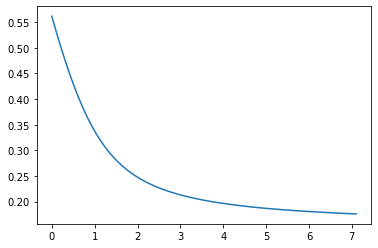

In [11]:
plt.plot(alphas,np.array(Eg), label="Ridge")
